<a href="https://colab.research.google.com/github/CooperFinn/Neural_Network_Algorithm_Projects/blob/master/Building_a_Convolutional_Neural_Network_Model_for_Image_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Convolutional Neural Network  for Image Classification with Keras

#1.Setup

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#2.Load and Examine Data

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [0]:
x_train[7]

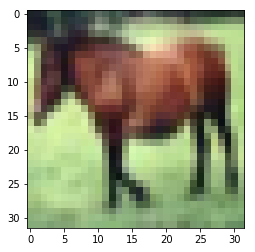

In [0]:
show_image=plt.imshow(x_train[7])

In [0]:
y_train[7]

array([7], dtype=uint8)

In [0]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[7])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
x_train[7]

array([[[0.10980392, 0.13725491, 0.15294118],
        [0.11764706, 0.13333334, 0.17254902],
        [0.12941177, 0.17254902, 0.18431373],
        ...,
        [0.16862746, 0.21960784, 0.1764706 ],
        [0.20392157, 0.2509804 , 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078432],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.4392157 , 0.53333336, 0.38039216],
        [0.45882353, 0.54901963, 0.39607844],
        [0.4509804 , 0.5411765 , 0.39215687]],

       [[0.13333334, 0.14117648, 0.16470589],
        [0.12941177, 0.12941177, 0.16862746],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.6862745 , 0.8156863 , 0.56078434],
        [0.69411767, 0.81960785, 0.5647059 ],
        [0.6901961 , 0.8156863 , 0.56078434]],

       ...,

       [[0.5568628 , 0.6901961 , 0.4627451 ],
        [0.5568628 , 0.6901961 , 0.4627451 ],
        [0.5882353 , 0

#3.Build Model

In [0]:
def convolutional_model():
    
    # create model
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [0]:
model=convolutional_model()
hist=model.fit(x_train, y_train_one_hot,batch_size=32, epochs=20,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 326s 8ms/step - loss: 1.5797 - acc: 0.4220 - val_loss: 1.2844 - val_acc: 0.5376
Epoch 2/20
40000/40000 [==============================] - 325s 8ms/step - loss: 1.1696 - acc: 0.5841 - val_loss: 0.9711 - val_acc: 0.6556
Epoch 3/20
40000/40000 [==============================] - 327s 8ms/step - loss: 1.0027 - acc: 0.6449 - val_loss: 0.8517 - val_acc: 0.7020
Epoch 4/20
40000/40000 [==============================] - 327s 8ms/step - loss: 0.9023 - acc: 0.6821 - val_loss: 0.7974 - val_acc: 0.7206
Epoch 5/20
40000/40000 [==============================] - 330s 8ms/step - loss: 0.8315 - acc: 0.7085 - val_loss: 0.8014 - val_acc: 0.7152
Epoch 6/20
40000/40000 [=

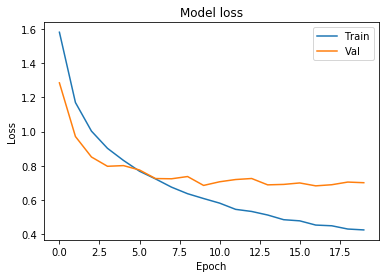

In [0]:
# visualize the model training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

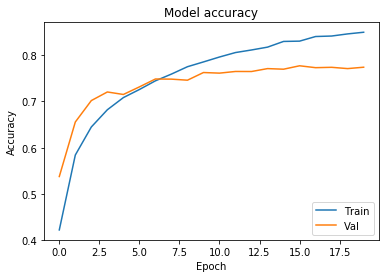

In [0]:
# visualize the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 21s 2ms/step


0.7725

In [0]:
# save the trained model
model.save('cooper_cifar10_model.h5')

Source:https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce